In [42]:
from bs4 import BeautifulSoup
import requests
import json
from PIL import Image
import matplotlib.pyplot as plt
from collections import Counter
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Phần A. Rút trích dữ liệu từ web: 

In [ ]:
url = "https://openaccess.thecvf.com/WACV2024"
response = requests.get(url)

## Bài 1

b, ['object-centric', 'video', 'representation', 'long-term', 'action', 'anticipation', 'clrernet:', 'improving', 'confidence', 'lane', 'detection', 'laneiou', 'training', 'ensembles', 'inliers', 'outliers', 'semi-supervised', 'active', 'learning', 'robust', 'source-free', 'domain', 'adaptation', 'fundus', 'image', 'segmentation', 'controlling', 'rate,', 'distortion,', 'realism:', 'towards', 'single', 'comprehensive', 'neural', 'image', 'compression', 'model', 'metavers:', 'meta-learned', 'versatile', 'representations', 'personalized', 'federated', 'learning', 'improving', 'open-set', 'semi-supervised', 'learning', 'self-supervision', 'fossil:', 'free', 'open-vocabulary', 'semantic', 'segmentation', 'synthetic', 'references', 'retrieval', 'activity-based', 'early', 'autism', 'diagnosis', 'using', 'multi-dataset', 'supervised', 'contrastive', 'learning', 'approach', 'label', 'shift', 'estimation', 'class-imbalance', 'problem:', 'bayesian', 'approach', 'seaturtleid2022:', 'long-span', 'd

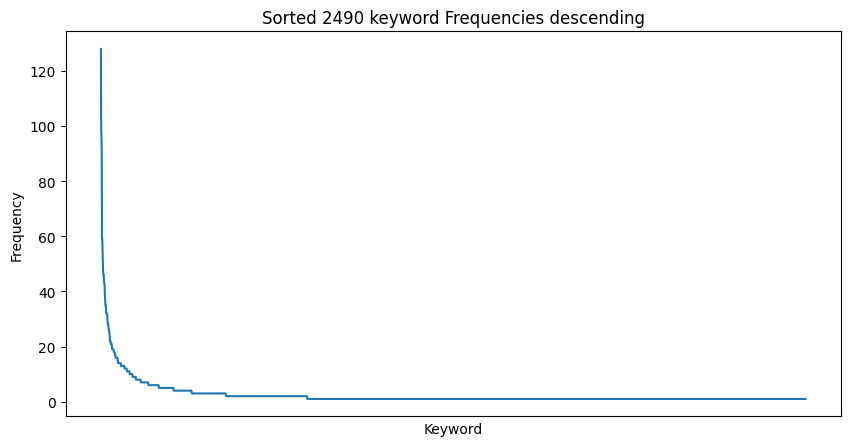

e,  {'learning': 128, 'image': 99, 'detection': 96, 'segmentation': 91, 'using': 59}


In [53]:
# a, Crawl tên của các bài báo khoa học được công bố trong hội nghị WACV 2024 từ đường dẫn: https://openaccess.thecvf.com/WACV2024

soup = BeautifulSoup(response.content, "html.parser")
titles = soup.find_all("dt", class_="ptitle")
paper_titles = [title.text.strip() for title in titles]

# b,  Thực  hiện  một  số  thao  tác  xử  lý văn bản  với  tên  của  các  bài  báo khoa học để lọc ra các keyword chính:
words = []
for title in paper_titles:
    # - Tách từ dựa trên dấu khoảng trắng
    title_words = title.split()
    # - Chuyển từng từ sang ký tự thường
    title_words = [word.lower() for word in title_words]
    # - Tạo mảng stopwords và lọc các từ không quan trọng trong lĩnh vực công nghệ thông tin
    stop_words = set(stopwords.words('english'))
    title_words = [word for word in title_words if word not in stop_words and word not in ['a', 'b', 'c']]
    words.extend(title_words)
print("b,", words)

# c, Thống kê tần số xuất hiện của từng keyword
word_freq = Counter(words)
print("c, ", word_freq)

# d, Chọn loại biểu đồ thích hợp và vẽ biểu đồ biểu diễn tần số xuất hiện của các keyword theo thứ tự giảm đần số lần xuất hiện
print("d,")
sorted_word_freq = dict(sorted(word_freq.items(), key=lambda item: item[1], reverse=True))
keywords = list(sorted_word_freq.keys())
frequencies = list(sorted_word_freq.values())
keywords_count = len(keywords)
plt.figure(figsize=(10, 5))
plt.plot(keywords, frequencies)
plt.xticks([]) 
plt.xlabel('Keyword')
plt.ylabel('Frequency')
plt.title('Sorted ' + str(keywords_count) + ' keyword Frequencies descending')
plt.show()

# e, Cho biết top 5 keyword được quan tâm nhiều nhất trong hội nghị lần này
top_5 = dict(list(sorted_word_freq.items())[:5])
print("e, ", top_5)

## Bài 2

b,  Counter({'Luc Van Gool': 6, 'Chetan Arora': 6, 'Stephen Gould': 5, 'Humphrey Shi': 5, 'Vishal M. Patel': 5, 'Baoxin Li': 5, 'Fernando De la Torre': 5, 'Ram Nevatia': 5, 'Abhinav Shrivastava': 5, 'Ulas Bagci': 5, 'Soma Biswas': 4, 'Naser Damer': 4, 'Xin Liu': 4, 'Trevor Darrell': 4, 'Marco Pedersoli': 4, 'Kun Han': 4, 'Xiaohui Xie': 4, 'Bryan A. Plummer': 4, 'Dimitris Metaxas': 4, 'Nathan Jacobs': 4, 'Daniel Cremers': 4, 'Ching-Chun Huang': 4, 'Hong-Han Shuai': 4, 'Kai Katsumata': 3, 'Duc Minh Vo': 3, 'Hideki Nakayama': 3, 'Joonseok Lee': 3, 'Sparsh Mittal': 3, 'Volker Tresp': 3, 'Djamila Aouada': 3, 'Michael Elad': 3, 'Eric Granger': 3, 'Shanlin Sun': 3, 'Xiangyi Yan': 3, 'Haoyu Ma': 3, 'Takayuki Okatani': 3, 'Yifei Fan': 3, 'François Brémond': 3, 'Hongdong Li': 3, 'Ngan Le': 3, 'Benjamin Risse': 3, 'Jiachen Li': 3, 'Shant Navasardyan': 3, 'Hajime Nagahara': 3, 'Ganesh Ramakrishnan': 3, 'Yunchao Wei': 3, 'Liang-Chieh Chen': 3, 'Di Liu': 3, 'Bernard Ghanem': 3, 'Zhe Lin': 3, 'Biplab

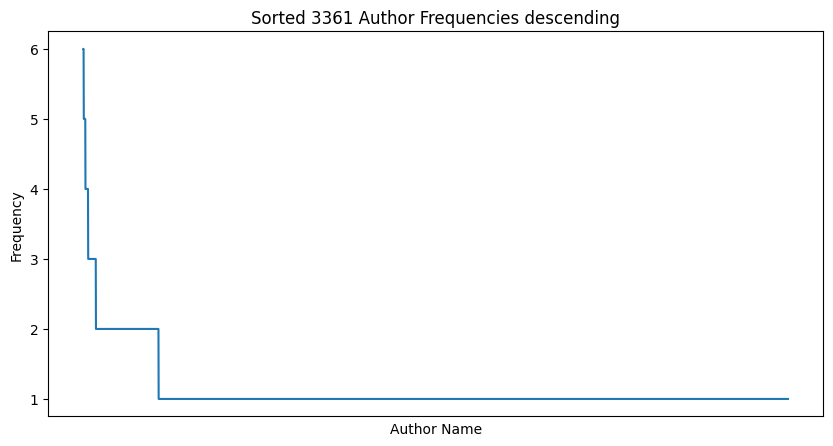

d,  {'Luc Van Gool': 6, 'Chetan Arora': 6, 'Stephen Gould': 5}


In [70]:
# a. Crawl tên của các tác giả có bài báo khoa học được công bố trong hội nghị WACV năm 2024. 
authors = soup.find_all("form", class_="authsearch")
authors = [author.text.strip() for author in authors]
authors = [author.rstrip(',') for author in authors]

# b. Thống kê tần số xuất hiện của từng tên tác giả. 
authors = Counter(authors)
print("b, ", authors)

# c. Chọn loại biểu đồ thích hợp và vẽ biểu đồ biểu diễn tần số xuất hiện tên của các tác giả theo thứ tự giảm dần số lần xuất hiện. 
print("c,")
sorted_authors = dict(sorted(authors.items(), key=lambda item: item[1], reverse=True))
authors_name = list(sorted_authors.keys())
authors_frequencies = list(sorted_authors.values())
authors_count = len(authors_name)
plt.figure(figsize=(10, 5))
plt.plot(authors_name, authors_frequencies)
plt.xticks([])
plt.xlabel('Author Name')
plt.ylabel('Frequency')
plt.title('Sorted ' + str(authors_count) + ' Author Frequencies descending')
plt.show()

# d. Cho biết top 3 tác giả có số lượng bài báo khoa học được công bố nhiều nhất trong hội nghị này.
top_3_authors = dict(list(sorted_authors.items())[:3])
print("d, ", top_3_authors)

# Phần B. Xử lý dữ liệu Json

## BÀI 3

In [3]:
file_path = "json/books.json"

with open(file_path, "r") as file:
    data = json.load(file)

#Câu a
book_node = data['bookstore']['book']
print("a, ", book_node)

#Câu b
book_titles = [book['title'] for book in book_node]
print("b, ", book_titles)

#Câu c
first_book_title = book_titles[0]
print("c, ", first_book_title)

#Câu d
first_two_books = book_node[:2]
print("d, ", first_two_books)

#Câu e
last_book_title = book_titles[-1]
print("e, ", last_book_title)

#Câu f
book_prices = [book['price'] for book in book_node]
print("f, ", book_prices)

#Câu g
book_prices_over_35 = [book['price'] for book in book_node if book['price'] > 35]
print("g, ", book_prices_over_35)

#Câu h
book_titles_with_prices_over_35 = [book['title'] for book in book_node if book['price'] > 35]
print("h, ", book_titles_with_prices_over_35)

#Câu i
book_prices_lower_35_or_over_40 = [book['price'] for book in book_node if book['price'] < 35 or book['price'] > 40]
print("h, ", book_prices_lower_35_or_over_40)

#Câu j
book_prices_between_40_and_50 = [book['price'] for book in book_node if 40 <= book['price'] <= 50]
print("j, ", book_prices_between_40_and_50)

#Câu k
book_authors = [book['author'] for book in book_node]
print("k, ", book_authors)

#Câu l
book_title_of_James_Linn = [book['title'] for book in book_node if "James Linn" in book['author']]
print("l, ", book_title_of_James_Linn)

#Câu m
book_title_of_JKRowling_lower_50 = [book['title'] for book in book_node if "J K. Rowling" in book['author'] and book['price'] < 50]
print("l, ", book_title_of_JKRowling_lower_50)

#Câu n
highest_book_price = max(book_prices)
print("n, ", highest_book_price)

#Câu o
average_book_price = sum(book_prices) / len(book_prices)
print("o, ", average_book_price)

#Câu p
book_year_title_LearningXML = [book['year'] for book in book_node if "Learning XML" in book['title']]
print("p, ", book_year_title_LearningXML)

a,  [{'title': 'Everyday Italian', 'author': 'Giada De Laurentiis', 'year': 2005, 'price': 30}, {'title': 'Harry Potter', 'author': 'J K. Rowling', 'year': 2005, 'price': 29.99}, {'title': 'XQuery Kick Start', 'author': ['James McGovern', 'Per Bothner', 'Kurt Cagle', 'James Linn', 'Vaidyanathan Nagarajan'], 'year': 2003, 'price': 49.99}, {'title': 'Learning XML', 'author': 'Erik T. Ray', 'year': 2003, 'price': 39.95}]
b,  ['Everyday Italian', 'Harry Potter', 'XQuery Kick Start', 'Learning XML']
c,  Everyday Italian
d,  [{'title': 'Everyday Italian', 'author': 'Giada De Laurentiis', 'year': 2005, 'price': 30}, {'title': 'Harry Potter', 'author': 'J K. Rowling', 'year': 2005, 'price': 29.99}]
e,  Learning XML
f,  [30, 29.99, 49.99, 39.95]
g,  [49.99, 39.95]
h,  ['XQuery Kick Start', 'Learning XML']
h,  [30, 29.99, 49.99]
j,  [49.99]
k,  ['Giada De Laurentiis', 'J K. Rowling', ['James McGovern', 'Per Bothner', 'Kurt Cagle', 'James Linn', 'Vaidyanathan Nagarajan'], 'Erik T. Ray']
l,  ['XQu

## Bài 4

In [10]:
file_path = "json/students.json"

with open(file_path, "r") as file:
    data = json.load(file)

#Câu a
students = data['class']['student']
print("a,")
for student in students:
    firstname = student['firstname']
    lastname = student['lastname']
    nickname = student['nickname']
    marks = student['marks']
    
    print(f"Student: {firstname} {lastname}, Nickname: {nickname}, Marks: {marks}")

#Câu b
marks = [student['marks'] for student in students]
print("b, ", marks)

#Câu c
firstname_with_mark_over_90 = [student['firstname'] for student in students if student['marks'] > 90]
print("c, ", firstname_with_mark_over_90)

#Câu d
marks_with_lastname_Kad = [student['marks'] for student in students if "Kad" in student['lastname']]
print("d, ", marks_with_lastname_Kad)

#Câu e
firstname_last_student = students[-1]['firstname']
print("e, ", firstname_last_student)

#Câu f
number_of_students_mark_over_90 = len([student for student in students if student['marks'] > 90])
print("f, ", number_of_students_mark_over_90)

#Câu g
average_mark = sum(marks) / len(marks)
print("g, ", average_mark)

#Câu h
firstname_lastname_last_student = students[-1]['firstname'] + " " + students[-1]['lastname']
print("h, ", firstname_lastname_last_student)

a,
Student: Dinkar Kad, Nickname: Dinkar, Marks: 85
Student: Vaneet Gupta, Nickname: Vinni, Marks: 95
Student: Jasvir Singh, Nickname: Jazz, Marks: 90
b,  [85, 95, 90]
c,  ['Vaneet']
d,  [85]
e,  Jasvir
f,  1
g,  90.0
h,  Jasvir Singh


# Phần C. Vẽ đồ họa với thư viện Turtle

In [5]:
import turtle
t = turtle.Turtle()
t.shape("turtle")
t.speed(1)

## Bài 7

In [ ]:
# Câu 7a
t.forward(50) 
t.left(90) 
t.forward(100) 
t.right(45)
turtle.done()

# Câu 7b
t.fd(100) 
t.lt(120) 
t.fd(100) 
t.lt(120) 
t.fd(100)
turtle.done()

# Câu 7c
t.fd(100) 
t.lt(180) 
t.fd(200) 
t.lt(180) 
t.fd(100) 
t.lt(90) 
t.fd(50 + 50) 
t.lt(90 * 2) 
t.fd(40 + 80 * 2)
turtle.done()

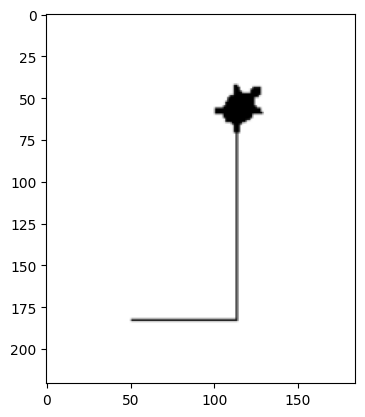

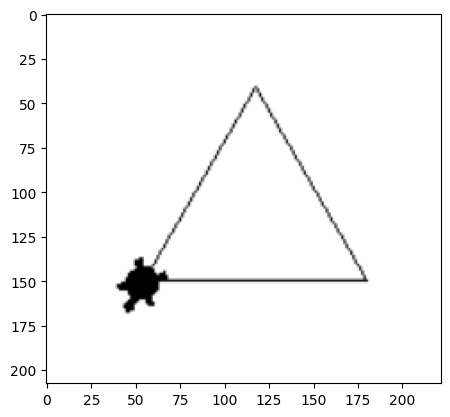

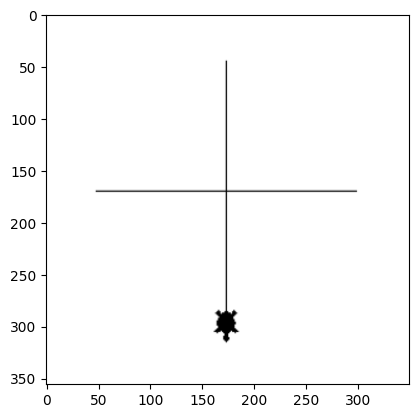

In [ ]:
plt.imshow(Image.open('./result/7a.png'))
plt.show()
plt.imshow(Image.open('./result/7b.png'))
plt.show()
plt.imshow(Image.open('./result/7c.png'))
plt.show()

## Câu 8

In [ ]:
t.right(90)
for i in range(6):
    t.forward(100)
    t.left(60)

for i in range(6):
    t.forward(100)
    t.right(60)

turtle.done()

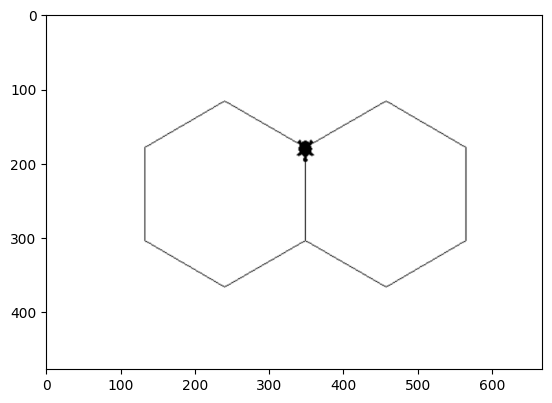

In [ ]:
plt.imshow(Image.open('./result/8.png'))
plt.show()

## Câu 9

In [ ]:
t.color("black", "red")
t.begin_fill()
t.circle(100)
t.end_fill()
turtle.done()

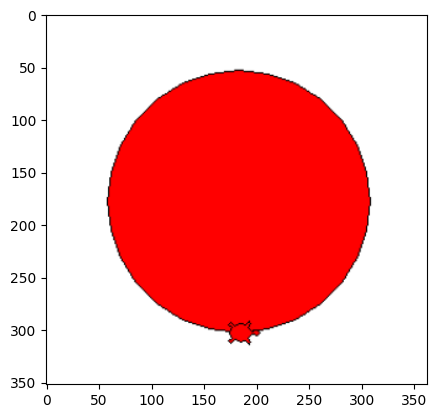

In [ ]:
plt.imshow(Image.open('./result/9.png'))
plt.show()

## Câu 10

In [ ]:
#Câu 10a
t.forward(100)
t.left(120)
t.forward(100)
t.left(120)
t.forward(100)
turtle.done()

#Câu 10b
for _ in range(4):
    t.forward(100)
    t.right(90)
turtle.done()

#Câu 10c
for _ in range(6):
    t.forward(100)
    t.right(60)
turtle.done()

#Câu 10d
for _ in range(8):
    t.forward(100)
    t.right(45)
turtle.done()

#Câu 10e
for _ in range(5):
    t.forward(200)
    t.right(144)
turtle.done()

#Câu 10f
t.forward(100)
t.left(60)
t.forward(50)
t.left(120)
t.forward(100)
t.left(60)
t.forward(50)
turtle.done()

#Câu 10g
t.forward(100)
t.right(90)
t.forward(50)
t.right(90)
t.forward(100)
t.right(90)
t.forward(50)
turtle.done()

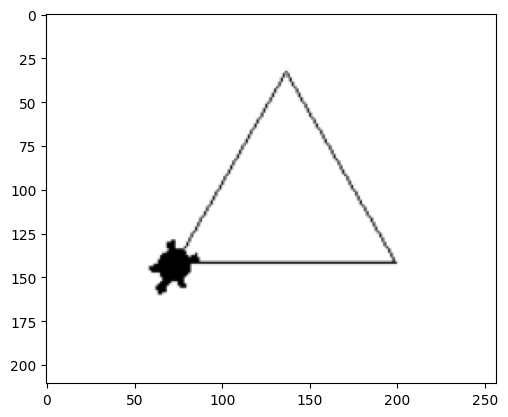

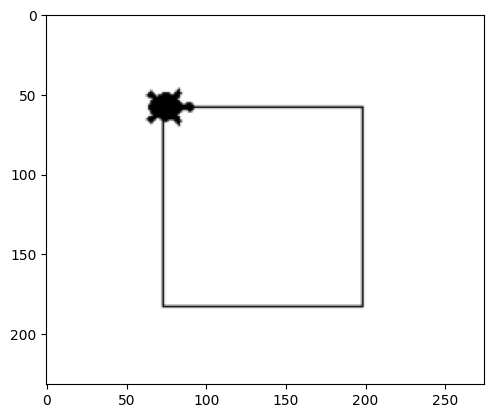

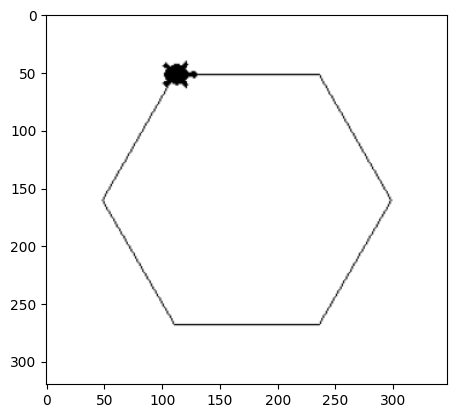

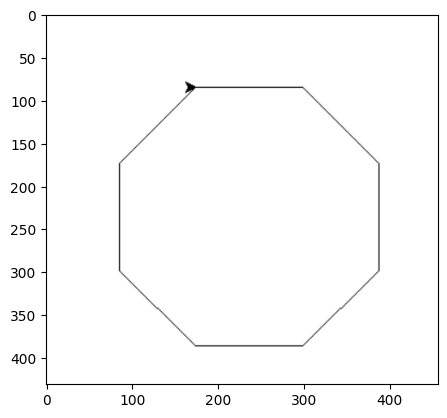

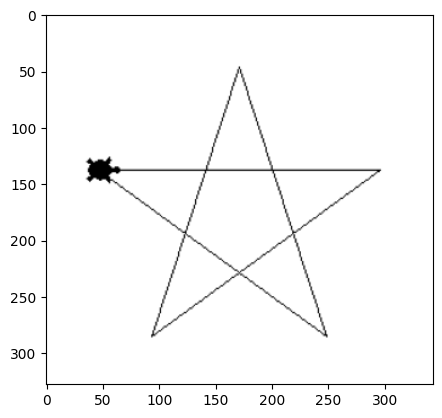

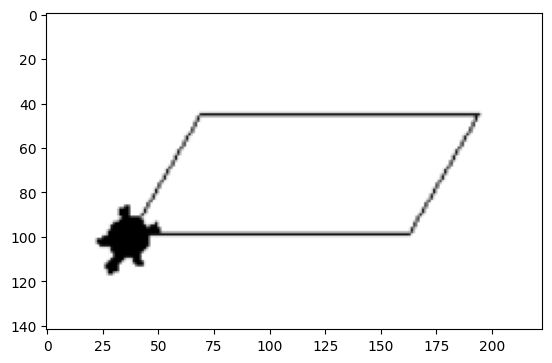

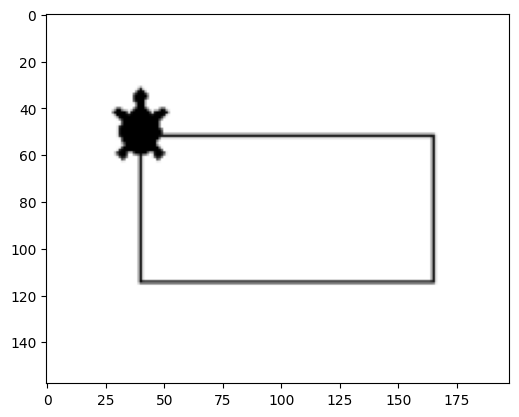

In [ ]:
plt.imshow(Image.open('./result/10a.png'))
plt.show()
plt.imshow(Image.open('./result/10b.png'))
plt.show()
plt.imshow(Image.open('./result/10c.png'))
plt.show()
plt.imshow(Image.open('./result/10d.png'))
plt.show()
plt.imshow(Image.open('./result/10e.png'))
plt.show()
plt.imshow(Image.open('./result/10f.png'))
plt.show()
plt.imshow(Image.open('./result/10g.png'))
plt.show()